<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/KNN_juguete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset_w_tags.csv")
print(df.head())
from sklearn.utils import shuffle
df = shuffle(df)###El ajuste depende de este shuffle*****

   Dominant_taxa_ID/ID_Environmental  OTU_10  OTU_24  OTU_17316  OTU_124  \
0                                  1      73     503         11       23   
1                                  2      94     324         51        0   
2                                  3      92      82         22        3   
3                                  4      58      79         23       27   
4                                  5     306     214         12       15   

   OTU_196  OTU_111  OTU_16  OTU_20  OTU_198  ...  OTU_7807  OTU_20167  \
0       19        0       5      65        6  ...         0          0   
1       26        1       1       4        9  ...         0          0   
2       78        1       1       0        0  ...         0          0   
3       49       11      63      14       94  ...         0          1   
4       50       24      13       6       48  ...         1          0   

   OTU_3763  OTU_998  OTU_618  OTU_961  OTU_3160  OTU_37856  OTU_882  \
0         0        0      

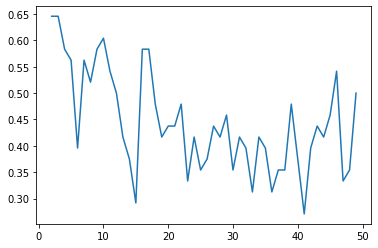

In [14]:
accs=[]
for k in range(2,50):
    df=shuffle(df)
    X = df.drop(['Tag'], axis = 1)
    y = df['Tag']
    from sklearn import preprocessing
    X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    Pred_y = neigh.predict(X_test)
    accs.append(metrics.accuracy_score(y_test, Pred_y))
plt.plot(range(2,50),accs)